In [1]:
%cd .. 

/home/d/PycharmProjects/protein_properties


In [2]:
# For automatic file reloading as usual
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from src.data.lightning_glyco import GlycoDataModule, GlycoDataConfig, GroupedBatchSampler, GlycoDataset
from src.models import GlycoModel
import pandas as pd
import os 
import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger, CSVLogger
import torch
from torch.utils.data import DataLoader, RandomSampler, Subset
from tqdm import tqdm

In [4]:
config = GlycoDataConfig(data_dir="data/glyco", embedding_path="data/sasa/sasaembeddings.h5", num_workers=4, classes={"T": 0, "N": 1}, np_path="data/glyco")
#data_module = GlycoDataModule(config=config)

#data_module.setup("fit")
model = GlycoModel(num_classes=len(config.classes.keys()))

In [5]:
GlycoDataset(config=config, split="train")

Creating numpy arrays...


  0%|          | 0/7429 [01:42<?, ?it/s]


KeyboardInterrupt: 

In [5]:
batch_sizes = []
for i, b in enumerate(data_module.train_dataloader()):
    batch_sizes.append(b[0].shape[0])
    

In [6]:
for i, b in enumerate(data_module.train_dataloader()):
    break

In [10]:
b[0] = b[0].float()
b[1] = b[1].float()

In [15]:
model.validation_step(b, 0)

/home/d/PycharmProjects/protein_properties/.venv/lib/python3.10/site-packages/lightning/pytorch/core/module.py:407: UserWarning: You are trying to `self.log()` but the `self.trainer` reference is not registered on the model yet. This is most likely because the model hasn't been passed to the `Trainer`
  rank_zero_warn(
/home/d/PycharmProjects/protein_properties/.venv/lib/python3.10/site-packages/lightning/pytorch/core/module.py:407: UserWarning: You are trying to `self.log()` but the `self.trainer` reference is not registered on the model yet. This is most likely because the model hasn't been passed to the `Trainer`
  rank_zero_warn(
/home/d/PycharmProjects/protein_properties/.venv/lib/python3.10/site-packages/lightning/pytorch/core/module.py:407: UserWarning: You are trying to `self.log()` but the `self.trainer` reference is not registered on the model yet. This is most likely because the model hasn't been passed to the `Trainer`
  rank_zero_warn(
/home/d/PycharmProjects/protein_prope

tensor(0.8812, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [ ]:
# Plot distribution of residues per accumlated batch
res_per_batch = []
accumulated_batches = 512
for i in range(100):
    batch = 0
    classes = []
    for i, b in enumerate(data_module.train_dataloader()):
        batch += (b[0].shape[0])
        if i % accumulated_batches == 0 or i == len(data_module.train_dataloader()) - 1:
            res_per_batch.append(batch)
            batch = 0
            

In [16]:
# Plot distribution of residues per accumlated batch
res_per_batch = []
accumulated_batches = 512
for i in range(100):
    batch = 0
    classes = []
    for i, b in enumerate(data_module.train_dataloader()):
        batch += (b[0].shape[1])
        if i % accumulated_batches == 0 or i == len(data_module.train_dataloader()) - 1:
            res_per_batch.append(batch)
            batch = 0
            classes = []

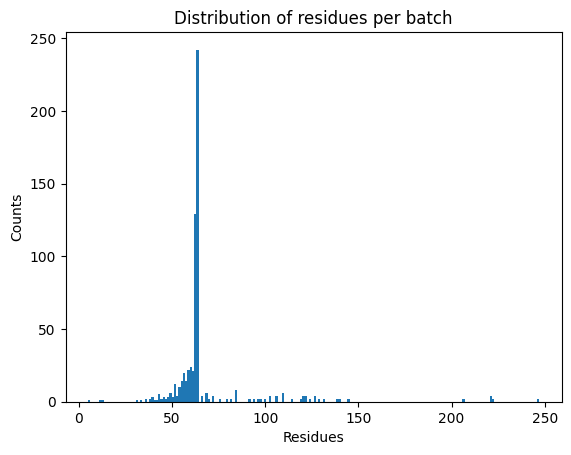

In [6]:
# Plot distribution of residues per accumlated batch
plt.hist(batch_sizes, bins=200)
plt.title("Distribution of residues per batch")
plt.xlabel("Residues")
plt.ylabel("Counts")
plt.show()

In [ ]:
logger = CSVLogger("logs", name="debug_model")
one_sample_train_set = DataLoader(Subset(data_module.train_dataset, [42]), batch_size=1, shuffle=False, num_workers=4)
one_samples_trainer = pl.Trainer(accelerator="gpu", detect_anomaly=True ,limit_val_batches=0.3 ,devices=1,precision="16-mixed",deterministic=True, max_epochs=100, enable_checkpointing=False, limit_train_batches=1, logger=logger)
model = SASABaseline(config.num_classes)

In [ ]:
one_samples_trainer.fit(model, one_sample_train_set, data_module.validation_dataloader())

In [ ]:
plt.plot(pd.read_csv("logs/debug_model/version_0/metrics.csv")["train_loss_epoch"].dropna().reset_index(drop=True), label="train_loss")
plt.plot(pd.read_csv("logs/debug_model/version_0/metrics.csv")["val_loss"].dropna().reset_index(drop=True), label="val_loss")
plt.legend()
plt.show()

In [ ]:
plt.plot(pd.read_csv("logs/debug_model/version_0/metrics.csv")["train_F1_epoch"].dropna().reset_index(drop=True), label="train_loss")
plt.plot(pd.read_csv("logs/debug_model/version_0/metrics.csv")["val_F1"].dropna().reset_index(drop=True), label="val_loss")
plt.legend()
plt.show()
